## Sagnac Frequency - MLTI Statistics

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace
from scipy.signal import hilbert


In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [4]:
def __load_beat(tbeg, tend, ring, path_to_data):

    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range
    from obspy import UTCDateTime


    tbeg, tend = UTCDateTime(tbeg), UTCDateTime(tend)

    dd1 = date.fromisoformat(str(tbeg.date))
    dd2 = date.fromisoformat(str(tend.date))

    year = str(tbeg.year)

    df = DataFrame()
    for dat in date_range(dd1, dd2):
        file = f"{year}/R{ring}/FJ{ring}_"+str(dat)[:10].replace("-", "")+".pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    ## trim to defined times
    df = df[(df.times_utc >= tbeg) & (df.times_utc < tend)]

    ## correct seconds
    df['times_utc_sec'] = [abs(tbeg - UTCDateTime(_t))  for _t in df['times_utc']]

    return df

## Configurations

In [10]:
config = {}

config['tbeg'] = UTCDateTime("2023-12-01 00:00")
config['tend'] = UTCDateTime("2023-12-31 00:00")

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Load MLTI times

In [11]:
mltiU = __load_mlti(config['tbeg'], config['tend'], "U", archive_path)

In [12]:
mltiZ = __load_mlti(config['tbeg'], config['tend'], "Z", archive_path)

In [13]:
mltiV = __load_mlti(config['tbeg'], config['tend'], "V", archive_path)

In [16]:
mltiU_t1, mltiU_t2 = __get_mlti_intervals(mltiU.time_utc, time_delta=50)
mltiZ_t1, mltiZ_t2 = __get_mlti_intervals(mltiZ.time_utc, time_delta=50)
mltiV_t1, mltiV_t2 = __get_mlti_intervals(mltiV.time_utc, time_delta=50)

In [22]:
durationU = mltiU_t2 - mltiU_t1
durationV = mltiV_t2 - mltiV_t1
durationZ = mltiZ_t2 - mltiZ_t1

(array([284.,   5.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

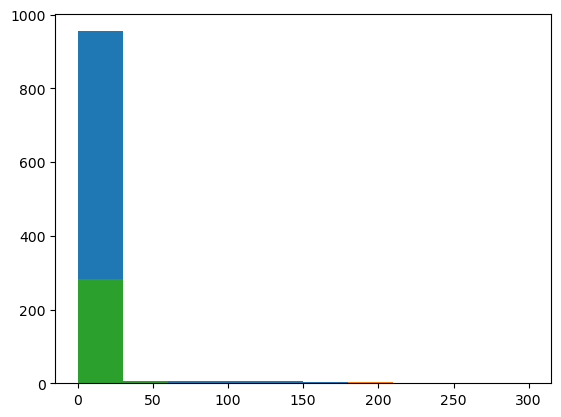

In [28]:
plt.hist(durationU/30, bins=10, range=(0, 300))
plt.hist(durationV/30, bins=10, range=(0, 300))
plt.hist(durationZ/30, bins=10, range=(0, 300))